# COGS 118A - Final Project

# Pawsitive Outcomes: Machine Learning for Shelter Cat Predictions

## Group members

- Veeraj Vishnu Sankar
- Ezra Lu
- Colin Kavanagh
- Thais Marie Diane Archaud

# Abstract 

This supervised machine learning project aims to predict good outcomes for cats in shelters using the Animal Shelter Intakes and Outcomes dataset from Long Beach. By good outcome, we mean cats being adopted or returned to their owners. The dataset includes information on primary colors, sex, intake conditions, intake types, reasons for intake, outcome types, outcome subtypes, and indicators for intake and outcome mortality. The data will be utilized to train a classification model that determines whether a cat is likely to have a good outcome while being in the shelter or not. Model performance will be evaluated through metrics such as ROC-AUC and F1 score, using cross-validation and testing on unseen data.

# Background

Cats are not a natural part of the ecosystem as they have been introduced into the ecosystem by humans. Because of this, free-ranging cats can cause serious damage to the ecosystem. Cats are natural predators that have greatly contributed to the extinction of 33 wildlife species worldwide <a name="cat_ecosys"></a>[<sup>[1]</sup>](#cat_ecosys), which is why it is the responsibility of humans to help keep cats off the streets in a humane way. Animal shelters play an important role in rescuing these homeless, free-ranging cats. Every year, around 6.5 million animals enter animal shelters nationwide. Due to lack of resources and funding, it is very challenging to find permanent homes for these cats. Because of this, of the 6.5 million shelter animals that are rescued, approximately 920,000 of them are euthanized with the majority of these euthanasias being performed on cats <a name="petstats"></a>[<sup>[2]</sup>](#petstats). To prevent the further unnecessary deaths of cats, we will analyze what features make cats appealing to adopt in animal shelters in order to help animal shelters increase cat adoptions in the U.S.

Although there is no prior work done on the animal shelter to suggest outcomes of specifically shelter cats, there have been classification models done to predict the outcome of shelter animals. We were able to find two people who have created models for animal shelter outcomes. Danielle’s work aimed to predict an animal’s outcome from the shelter based on their breed, color, sex, and age using random forests classifier to predict its outcome. Although her model had an f-1 score of 0.73, her model would incorrectly classify “adoption” as “return to owner” and would misclassify the outcomes of popular breeds as “transfer” or “death” when the true value was “euthanasia” <a name="dani"></a>[<sup>[3]</sup>](#dani). In Mohammad’s work, it also aims to predict the outcomes of animals in animal shelters by using a decision tree classifier <a name="mohammad"></a>[<sup>[4]</sup>](#mohammad). For our project, instead of predicting the outcomes of animals, we will predict the likelihood of a cat facing a good outcome based on their attributes.

# Problem Statement

Shelters often face challenges in assessing the potential outcomes for animals, leading to overcrowding, limited resources, and the risk of euthanasia. By formulating the problem of determining the likelihood of positive outcomes for cats in shelters, we would like to quantifiably measure and improve the efficiency of shelter operations, and enhance the overall well-being and good outcome rates for cats in shelters. This would help animal shelters operate more successfully and efficiently overall by streamlining the adoption process and better allocating resources.

We can develop a predictive model based on logistic regression that can help shelter personnel identify cats with a higher likelihood of facing a good outcome in a shelter by training it on historical data from animal shelter intakes and outcomes.

This problem can be quantified because it entails foretelling a binary outcome (outcome likelihood) based on quantitative characteristics. Every input used, such as age, gender, breed, health condition, can be represented using a value or a category.

This problem can be measured by different metrics : the adoption rate, which is a direct measure of the number of cats adopted over a certain period of time. The length of stay, the return-to-owner and euthanasia rate are also metrics which can be used to define it. These rates are clearly observable using data from shelters and can be used to enhance overall positive outcomes for cats.

Because it can be duplicated and happens frequently in animal shelter settings, the issue is reproducible. Over time, new data can be gathered, allowing the model to be continually updated and trained to increase its prediction power.

# Data

Animal Shelter Data — datalongbeach: [here](https://data.longbeach.gov/explore/dataset/animal-shelter-intakes-and-outcomes/table/?disjunctive.animal_type&disjunctive.primary_color&disjunctive.sex&disjunctive.intake_cond&disjunctive.intake_type&disjunctive.reason&disjunctive.outcome_type&disjunctive.outcome_subtype&disjunctive.intake_is_dead&disjunctive.outcome_is_dead&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7ImFsaWduTW9udGgiOnRydWUsInR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6ImFnZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6InJhbmdlLWN1c3RvbSIsInBvc2l0aW9uIjoiY2VudGVyIn1dLCJ4QXhpcyI6ImludGFrZV9kYXRlIiwibWF4cG9pbnRzIjpudWxsLCJ0aW1lc2NhbGUiOiJtb250aCIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd25UaW1lc2NhbGUiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJpbnRha2VfaXNfZGVhZCIsInN0YWNrZWQiOiJub3JtYWwiLCJjb25maWciOnsiZGF0YXNldCI6ImFuaW1hbC1zaGVsdGVyLWludGFrZXMtYW5kLW91dGNvbWVzIiwib3B0aW9ucyI6eyJkaXNqdW5jdGl2ZS5hbmltYWxfdHlwZSI6dHJ1ZSwiZGlzanVuY3RpdmUucHJpbWFyeV9jb2xvciI6dHJ1ZSwiZGlzanVuY3RpdmUuc2V4Ijp0cnVlLCJkaXNqdW5jdGl2ZS5pbnRha2VfY29uZCI6dHJ1ZSwiZGlzanVuY3RpdmUuaW50YWtlX3R5cGUiOnRydWUsImRpc2p1bmN0aXZlLnJlYXNvbiI6dHJ1ZSwiZGlzanVuY3RpdmUub3V0Y29tZV90eXBlIjp0cnVlLCJkaXNqdW5jdGl2ZS5vdXRjb21lX3N1YnR5cGUiOnRydWUsImRpc2p1bmN0aXZlLmludGFrZV9pc19kZWFkIjp0cnVlLCJkaXNqdW5jdGl2ZS5vdXRjb21lX2lzX2RlYWQiOnRydWV9fX1dLCJkaXNwbGF5TGVnZW5kIjp0cnVlLCJhbGlnbk1vbnRoIjp0cnVlLCJ0aW1lc2NhbGUiOiIifQ%3D%3D).

For our project, we will be employing a subset of the City of Long Beach's Animal Shelter data. This dataset encompasses a broad array of animal types, including dogs, birds, and wild animals. However, our analysis will be limited to cats, which constitute approximately 50 percent of the total data. We've made this decision due to the sparseness of data points related to other animals in contrast to the number of variables. This disparity would make it challenging to generate accurate or substantial predictions for animal categories outside of "Cats".

* link to CLEAN data: [here](https://github.com/COGS118A/Group009-SP23/blob/main/clean_data.csv).

* Size of dataset: 16,985 observations, 215 “variables” (many variables were one hot encoded)

* removed "Animal Type", "Animal ID", "intake_is_dead", "outcome_is_dead" columns

* “days in shelter” was calculated by subtracting intake date from outtake date.

* “date” rows were dropped due to irrelevancy. 

* list defining “good” outcomes was now define: ['ADOPTION', 'FOSTER', 'COMMUNITY CAT', 'FOSTER TO ADOPT', 'RESCUE', 'RETURN TO WILD HABITAT', 'HOMEFIRST', 'RETURN TO OWNER', 'SHELTER, NEUTER, RETURN', 'TRAP, NEUTER, RELEASE']

* dropped “outcome” strings, now irrelevant

* dropped “crossing” column (too complex for project)

* One hot encoded categorical variables, changed from about 15 columns to 215. 

* Critical Variables: Age, Intake type, Outcome type and Reason for intake. 

Code related to data cleaning and EDA is in the Results section.

# Proposed Solution

The primary function of our model will be to use various features (such as primary color, sex, intake conditions, intake types, reasons for intake, outcome types, outcome subtypes, and indications for intake and outcome mortality) to predict a binary outcome: whether a cat is likely to have a good outcome (adoption, return to owner etc) or a bad outcome (euthanasia, transfer etc). The outcomes have various different categories, but can be simplified into a good or bad binary.

As for a benchmark model, we will start with a simple logistic regression model given its interpretability and suitability for binary classification tasks. This model will provide a baseline against which we can compare the performance of more complex models. If other models do not significantly outperform the logistic regression model, its simplicity and interpretability might make it the preferred choice.

To ensure the model's applicability, we'll preprocess the data by one-hot encoding categorical variables like age, intake type, outcome type, and reason for intake. This conversion of categorical data into a format that can be provided to machine learning algorithms will ensure our model can utilize all available information.

The implementation of the solution will be done in Python, using libraries like pandas and numpy  for data manipulation, sklearn for machine learning algorithms, and matplotlib or seaborn for visualizations. Each step will be clearly documented in a Jupyter notebook or google colab.

# Evaluation Metrics

The primary evaluation metric we intend to use is the Receiver Operating Characteristic for Area Under the Curve (ROC-AUC, or AUC for short) metric. We decided to go with this metric because it works well with the algorithm that we have decided to use (logistic regression). AUC is appropriate for logit because it allows us to determine how well the model correctly predicts classes. While our project's issue is essential, it isn't as dire as other machine learning projects like cancer testing. Indicating that a cat won't get adopted when it actually will is a pleasant surprise instead of a life-or-death situation. Therefore, we have more leeway regarding classification levels and don't have to worry about the severity of picking something like a false negative over a false positive. ROC AUC compares the false classification rates at all classification thresholds, making it ideal for a model that isn't making high-stakes predictions. It also allows us to change the classification rate without significant concern for the consequences of false predictions. The ROC AUC curve compares the true positive rate (recall) to the false positive rate (1-specificity). We calculate these as follows:

$$\text{Recall} = \frac{\text{TP}}{\text{TP + FN}}$$

$$\text{Specificity} = \frac{\text{TN}}{\text{TN + FP}}$$


The greater the area under the curve (AUC), the better the model distinguishes between the two classes. The best possible "AOC" would be a value of 1, indicating that the model can perfectly differentiate the two classes. The worst possible "AOC" we can have is 0.5, meaning that the model cannot distinguish the two classes and therefore predicts by chance. To plot this curve, we use different classification thresholds and find the TPR and FPR based on those thresholds. We then plot the TPR and FPR on the x and y axes. 

We also plan to use the F-score metric. The F-score is appropriate for this model because it is another way of indicating its performance concerning the bias-variance tradeoff. The F-score shows a weighted average of the precision and recall scores, giving us a metric that favors a balance between the two. The F-score will be lower if the precision or recall is higher than the other metric. We calculate precision using the following formula:

$$\text{Precision} = \frac{\text{TP}}{\text{TP + FP}}$$

The F score is calculated by using the following formula:

$$\text{F-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}}$$

# Results

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/COGS118A/Group009-SP23/main/animal-shelter-intakes-and-outcomes.csv'
df = pd.read_csv(url)
df = df.drop(columns=["Animal Type", "Animal ID", "intake_is_dead", "outcome_is_dead"])
#subtract intake date from outtake date to get days in shelter as well as age at intake (days)
df = df.assign(Intake_Date_dt=pd.to_datetime(df['Intake Date']))
df = df.assign(Outcome_Date_dt=pd.to_datetime(df['Outcome Date']))
df = df.assign(DOB_date=pd.to_datetime(df['DOB']))
df['days_in_shelter'] = (df['Outcome_Date_dt'] - df['Intake_Date_dt']).dt.days
df["age_at_intake"] = (df["Outcome_Date_dt"] - df["DOB_date"]).dt.days
#drop date rows, now irrelevant
df = df.drop(columns=["Outcome_Date_dt", "Intake_Date_dt", "DOB", 'Intake Date', 'Outcome Date', "DOB_date" ,"Age", "was_outcome_alive"])
#create list defining "good" outcomes
good_outcomes = ['ADOPTION', 'FOSTER', 'COMMUNITY CAT', 'FOSTER TO ADOPT', 'RESCUE', 'RETURN TO WILD HABITAT', 'HOMEFIRST', 'RETURN TO OWNER', 'SHELTER, NEUTER, RETURN', 'TRAP, NEUTER, RELEASE']
#check if cat faced a good outcome, 1 if it did, 0 if it didn't
df['good_outcome'] = df['Outcome Type'].isin(good_outcomes).astype(int)
#drop outcome related strings (irrelevant)
df = df.drop(columns=["Outcome Type", "Outcome Subtype"])
#drop "crossing" column (data is too difficult to interpret for span of project)
df = df.drop(columns=["Crossing"])
#drop "Animal Name" column (irrelevant for analysis)
df = df.drop(columns=["Animal Name"])
df = df.dropna()

### Exploratory Analysis of the Categorical Variables

We utilise a Frequency analysis of the categorical Variables. The distribution of categories within 'Intake Type', 'Intake Condition', 'Secondary Color', and 'Jurisdiction' is significantly skewed, with one or two categories predominating. The reasons for some of these variables being dominated by one or two categories is predictable. For instance, since the dataset is from the long beach animal shelter, the 'Jurisdiction' of most of animals is Long Beach. However, the remaining categorical variables demonstrate a more balanced distribution, featuring at least five noteworthy categories with substantial presence. You can scroll through to see the catogory counts for the 8 categorical variables.

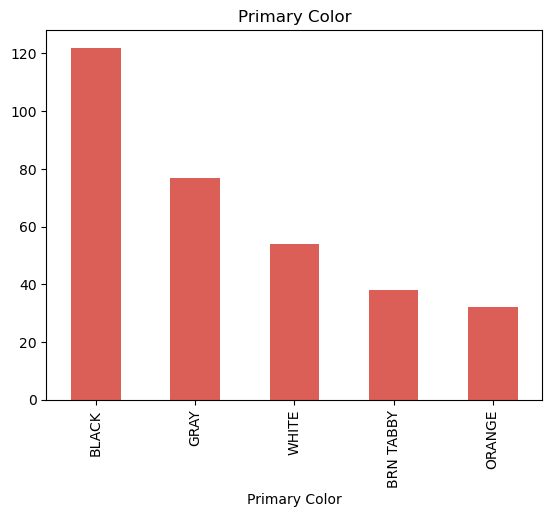

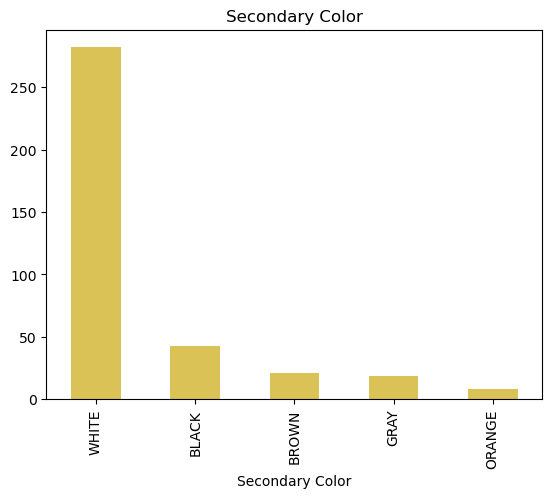

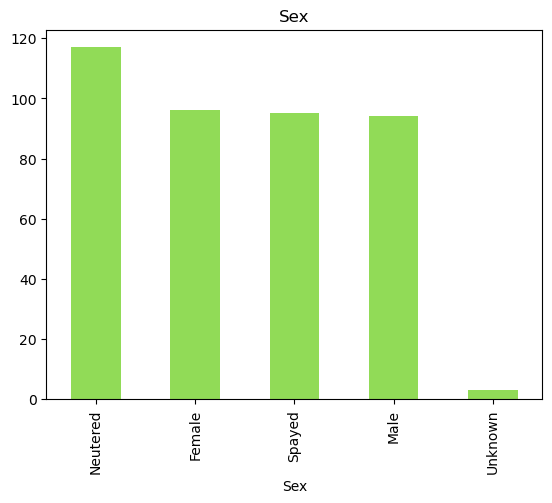

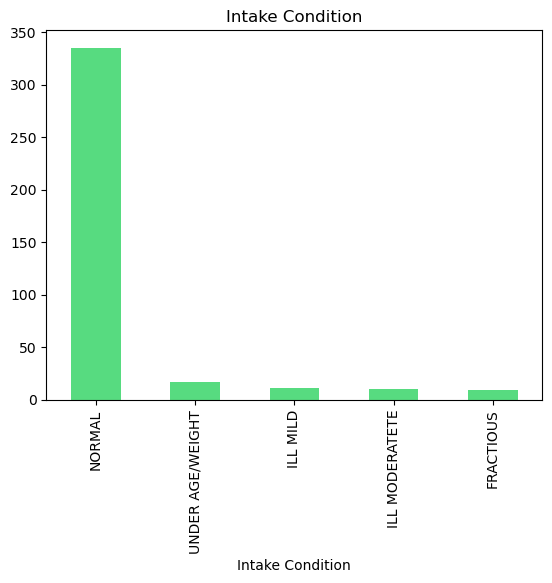

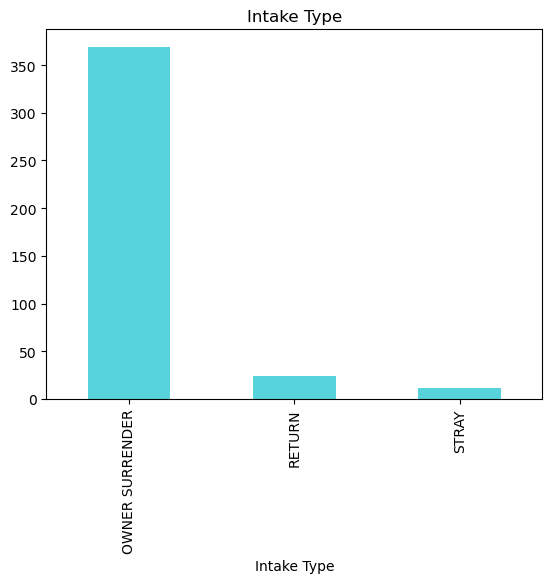

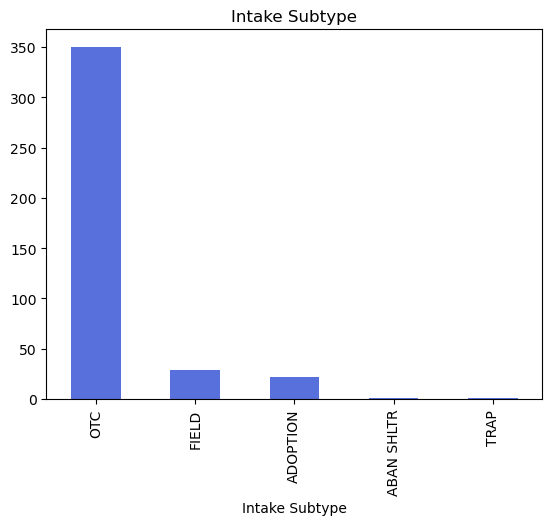

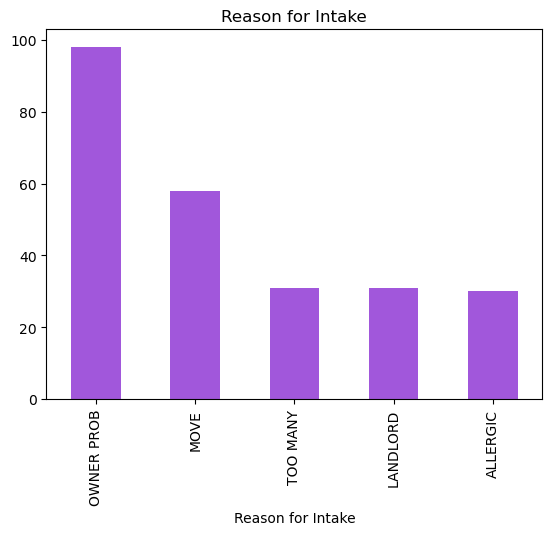

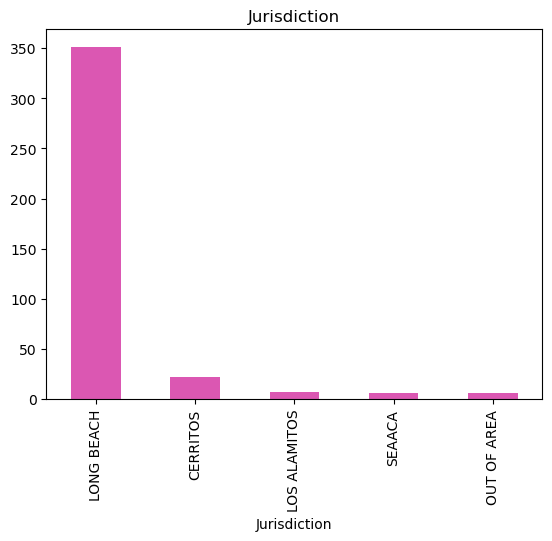

In [3]:
cat_cols = ['Primary Color', 'Secondary Color', "Sex", "Intake Condition", "Intake Type", "Intake Subtype", "Reason for Intake", "Jurisdiction"]
# Create a color palette with as many colors as there are columns
palette = sns.color_palette("hls", len(cat_cols))

for idx, column in enumerate(cat_cols):
    # Use the color corresponding to the current column
    color = palette[idx]

    # Plot the data using this color
    df[column].value_counts().head(5).plot(kind='bar', color=color)

    plt.title(column)
    plt.show()

### Exploratory Analysis of the Non-Categorical Variables

We use a correlation matrix for our non-categorical variable analysis. We can see that our the `good_outcomes` column is not too directly correlated to any one variable. The correlations are moderate, with the number of days the cat spent in shelter having the most impact on the outcome of the cat. From this, we can infer that the number of days spent in the shelter will affect the likelihood of a cat having a good outcome.

In [4]:
df_1 = df.drop(columns=['Primary Color', 'Secondary Color', "Sex", "Intake Condition", "Intake Type", "Intake Subtype", "Reason for Intake", "Jurisdiction"])

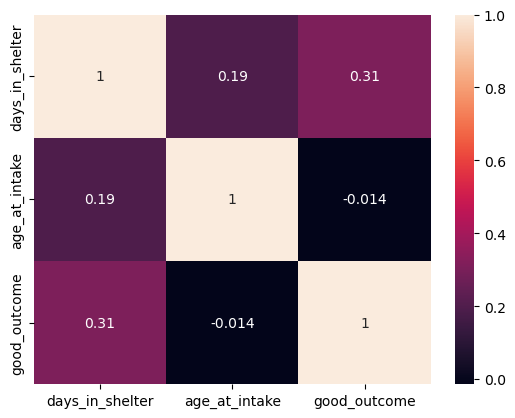

In [5]:
corr_matrix = df_1.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Data Wrangling

We manually removed some columns we felt were incompatible with the problem at hand, and modified some of them. 

Here is the code for this selection:

In [6]:
#load data
df = pd.read_csv('animal-shelter-intakes-and-outcomes.csv')
#remove useless columns
df = df.drop(columns=["Animal Type", "Animal ID", "intake_is_dead", "outcome_is_dead"])
#subtract intake date from outtake date to get days in shelter as well as age at intake (days)
df = df.assign(Intake_Date_dt=pd.to_datetime(df['Intake Date'])) 
df = df.assign(Outcome_Date_dt=pd.to_datetime(df['Outcome Date']))
df = df.assign(DOB_date=pd.to_datetime(df['DOB']))
df['days_in_shelter'] = (df['Outcome_Date_dt'] - df['Intake_Date_dt']).dt.days
df["age_at_intake"] = (df["Outcome_Date_dt"] - df["DOB_date"]).dt.days
#drop date rows, now irrelevant
df = df.drop(columns=["Outcome_Date_dt", "Intake_Date_dt", "DOB", 'Intake Date', 'Outcome Date', "DOB_date" ,"Age"])
#create list defining "good" outcomes
good_outcomes = ['ADOPTION', 'FOSTER', 'COMMUNITY CAT', 'FOSTER TO ADOPT', 'RESCUE', 'RETURN TO WILD HABITAT', 'HOMEFIRST', 'RETURN TO OWNER', 'SHELTER, NEUTER, RETURN', 'TRAP, NEUTER, RELEASE']
#check if cat faced a good outcome, 1 if it did, 0 if it didn't
df['good_outcome'] = df['Outcome Type'].isin(good_outcomes).astype(int)
#drop outcome related strings (irrelevant)
df = df.drop(columns=["Outcome Type", "Outcome Subtype"])
#drop "crossing" column (data is too difficult to interpret for span of project)
df = df.drop(columns=["Crossing"])
#drop "Animal Name" column (irrelevant for analysis)
df = df.drop(columns=["Animal Name"])
#one hot encode data
df = pd.get_dummies(df, columns = ['Primary Color', 'Secondary Color', "Sex", "Intake Condition", "Intake Type", "Intake Subtype", "Reason for Intake", "Jurisdiction"])
df

#save data to csv in repo
#df.to_csv('clean_data.csv')
display(df)

,was_outcome_alive,days_in_shelter,age_at_intake,good_outcome,Primary Color_B-C PT,Primary Color_BC LYNX PT,Primary Color_BL LYNX PT,Primary Color_BLACK,Primary Color_BLK SMOKE,Primary Color_BLK TABBY,...,Jurisdiction_LA COUNTY,Jurisdiction_LONG BEACH,Jurisdiction_LOS ALAMITOS,Jurisdiction_ORANGE CNTY,Jurisdiction_OUT OF AREA,Jurisdiction_SEAACA,Jurisdiction_SEAL BEACH,Jurisdiction_SIGNAL HILL,Jurisdiction_TORRANCE AC,Jurisdiction_WESTMINSTER
0,1,5,127.0,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1,7,249.0,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1,2,367.0,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1,2,8.0,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1,2,8.0,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16980,1,4,33.0,1,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
16981,1,11,741.0,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
16982,1,2,1097.0,1,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
16983,1,4,65.0,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


### Logit
We chose to use logistic regression as the first algorithm to solve our problem due to the binary outcome researched. We wanted the probability of a cat having a good outcome in a shelter so for our results to be interpretable, logistic regression was the best fit.

In [3]:
import numpy as np
import itertools
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import validation_curve

url = 'https://raw.githubusercontent.com/COGS118A/Group009-SP23/main/clean_data.csv'
data = pd.read_csv(url)
# Ensure data is loaded correctly
data = data.dropna()
print(data.shape)

(16467, 215)


In [8]:
# Define predictors and labels
X = data.drop('good_outcome', axis=1)
y = data['good_outcome']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [9]:
# Evaluate the model
print("Model accuracy: ", accuracy_score(y_test, y_pred, normalize=True), "\n")
print("Classification report:")
print(classification_report(y_test, y_pred))

Model accuracy:  0.7379073062133171 

Classification report:
              precision    recall  f1-score   support

           0       0.68      0.55      0.61      1828
           1       0.76      0.85      0.80      3113

    accuracy                           0.74      4941
   macro avg       0.72      0.70      0.71      4941
weighted avg       0.73      0.74      0.73      4941



<Figure size 640x480 with 0 Axes>

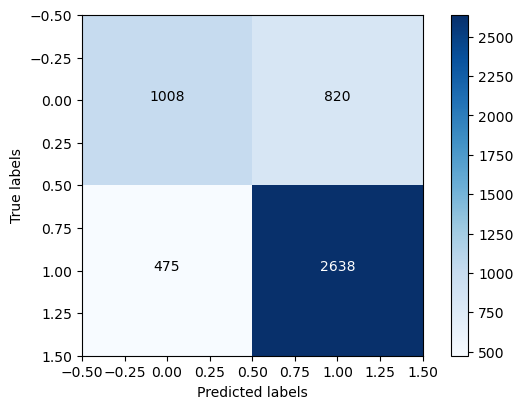

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [11]:
# Specificity
spec = cm[0][0] / (cm[0][0] + cm[1][0])
print('Specificity: ', spec)

Specificity:  0.6797033041132838


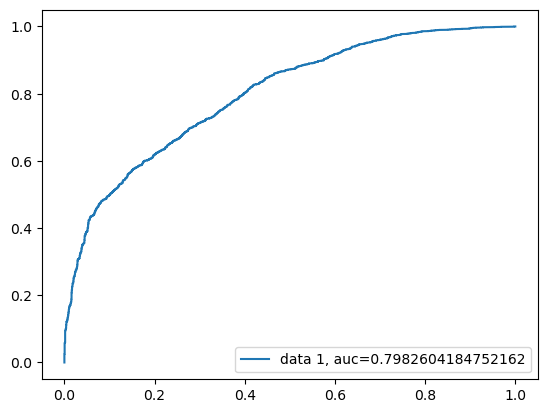

ROC-AUC Score:  0.7982604184752162


In [12]:
# ROC-AUC Curve
y_pred_proba = model.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print("ROC-AUC Score: ", roc_auc_score(y_test, y_pred_proba, average=None))

Our Logistic Regression model performed well with it performing with an accuracy of 74% on our test data. Our model also has an ROC-AUC score of 0.80, which means it performs extremely well and is highly accurate. When looking at other evaluation metrics, we see that our model has a recall score of 85%, precision score of 76%, specificity score of 68%, and a f1-score of 80%.

Overall, our model exhibits good accuracy and relatively good performance in correctly identifying positive cases. However, we wanted to investigate different ways to get a better accuracy.

#### Optimizing Our Logit Model

We wanted to investigate the impact of a single hyperparameter on the model's performance.

The resulting validation curve plot shows the training and validation scores as a function of the "C" parameter. The shaded areas represent the standard deviation of the scores. The plot helps visualize the relationship between the "C" parameter and the model's performance, allowing us to identify the optimal value for "C" that balances bias and variance.

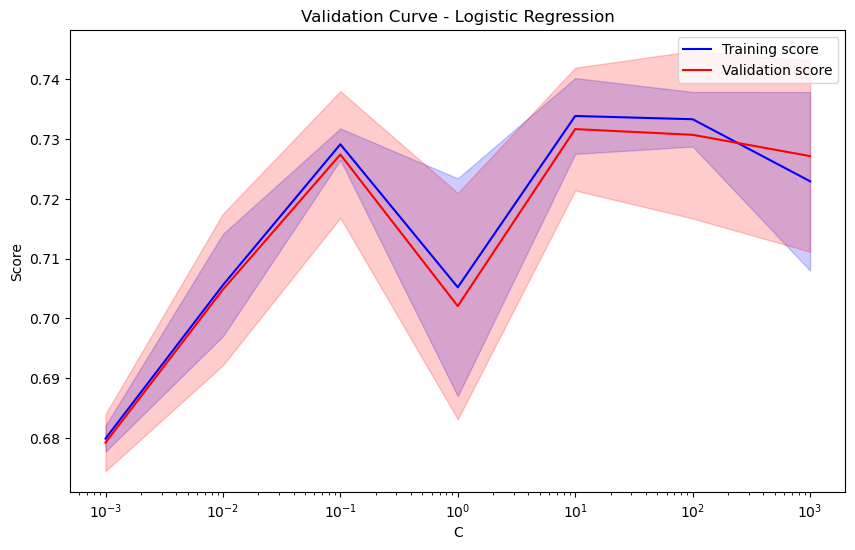

In [15]:
param_range = np.logspace(-3, 3, 7)

train_scores, valid_scores = validation_curve(
    estimator=LogisticRegression(max_iter=1000),
    X=X_train,
    y=y_train,
    param_name='C',
    param_range=param_range,
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training score', color='blue')
plt.plot(param_range, valid_mean, label='Validation score', color='red')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='red')

plt.xlabel('C')
plt.ylabel('Score')
plt.xscale('log')
plt.title('Validation Curve - Logistic Regression')

plt.legend(loc='best')

plt.show()

Since the most optimal C value was a value of 1, we were able to confirm that our corrent logit model was the most optimal one.

### Random Forests 

We realized that the relationship between predictors and the target could be more complex than we thought, so using Random Forest could yield a better performance.

#### Hyperparameter Tuning
For our Random Forest model, we made some modifications to the code. We imported RandomForestClassifier from sklearn.ensemble and `classification_report` from sklearn.metrics to evaluate the performance of the model. We iterated over different values of `max_depth` from 10 to 20 and computed the ROC-AUC score by predicting the probabilities using `predict_proba` and then calculating the area under the ROC curve using `roc_auc_score`.

We also predicted the test data using predict and generated a classification report to assess the precision, recall, F1-score, and support for each class. We stored the ROC-AUC scores and classification reports in lists for further analysis.

The optimal ROC AUC score was determined by selecting the maximum value from the computed scores. To visualize the performance of the random forest models, we created a plot of the ROC-AUC scores for different values of `max_depth`. We also plotted a decision tree from the random forest model with `max_depth` equal to 10, which achieved the highest ROC-AUC score.

The classification reports provide insights into the performance of the random forest models for each value of `max_depth`. They include metrics such as precision, recall, F1-score, and support for each class, allowing us to evaluate the model's effectiveness in predicting different classes.

By examining the ROC-AUC scores and classification reports, we can select the optimal `max_depth` that yields the best performance for our random forest model in terms of ROC-AUC and classification metrics.

In [5]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

def get_data():
    url = 'https://raw.githubusercontent.com/COGS118A/Group009-SP23/main/clean_data.csv'
    data = pd.read_csv(url)
    data = data.dropna()
    print(data.shape)
    return data

In [9]:
# Defining arrays for all of the scores
auc_score = []
classification_reports = []

for i in range(10, 20):
    # Train a random forest classifier model on the training data
    forestModel = RandomForestClassifier(max_depth=i)
    forestModel.fit(X_train, y_train)

    # Predict probabilities and calculate the ROC AUC score
    y_pred_proba = forestModel.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_score.append(auc)
    print("Model {} ROC-AUC: {:.4f}".format(i-9, auc))

    # Predict and evaluate the model
    y_pred = forestModel.predict(X_test)
    report = classification_report(y_test, y_pred)
    classification_reports.append(report)

    print("Model {} Classification Report:\n{}".format(i, report))
    print("-" * 60)

print()
print("Optimal ROC-AUC: {:.4f}".format(max(auc_score)))

Model 1 ROC-AUC: 0.8301
Model 10 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.36      0.51      1828
           1       0.72      0.96      0.82      3113

    accuracy                           0.74      4941
   macro avg       0.78      0.66      0.67      4941
weighted avg       0.77      0.74      0.71      4941

------------------------------------------------------------
Model 2 ROC-AUC: 0.8362
Model 11 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.39      0.54      1828
           1       0.73      0.96      0.83      3113

    accuracy                           0.75      4941
   macro avg       0.79      0.68      0.68      4941
weighted avg       0.77      0.75      0.72      4941

------------------------------------------------------------
Model 3 ROC-AUC: 0.8372
Model 12 Classification Report:
              precision    recall  f1-score   support

 

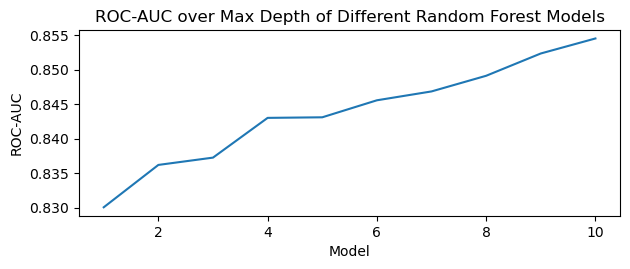

In [17]:
# Creating plots of the ROC-AUC of Max Depth of Different Random Forest Models
auc_array = np.array(auc_score)
x = np.arange(1, 11)

auc_plot = plt.subplot(2, 1, 1)
plt.plot(x, auc_array)
auc_plot.set_title("ROC-AUC over Max Depth of Different Random Forest Models")
plt.xlabel("Model")
plt.ylabel("ROC-AUC")
plt.tight_layout()

forest5Model = RandomForestClassifier(max_depth=20)
forest5Model.fit(X_train, y_train)


# Show the plot
plt.show()

#### Model Evaluation

Based on the ROC-AUC scores of the Random Forest classifiers of varying depths, a `max_depth` of 20 appears to be the most optimal, so we will be using these settings for our Random Forest model.

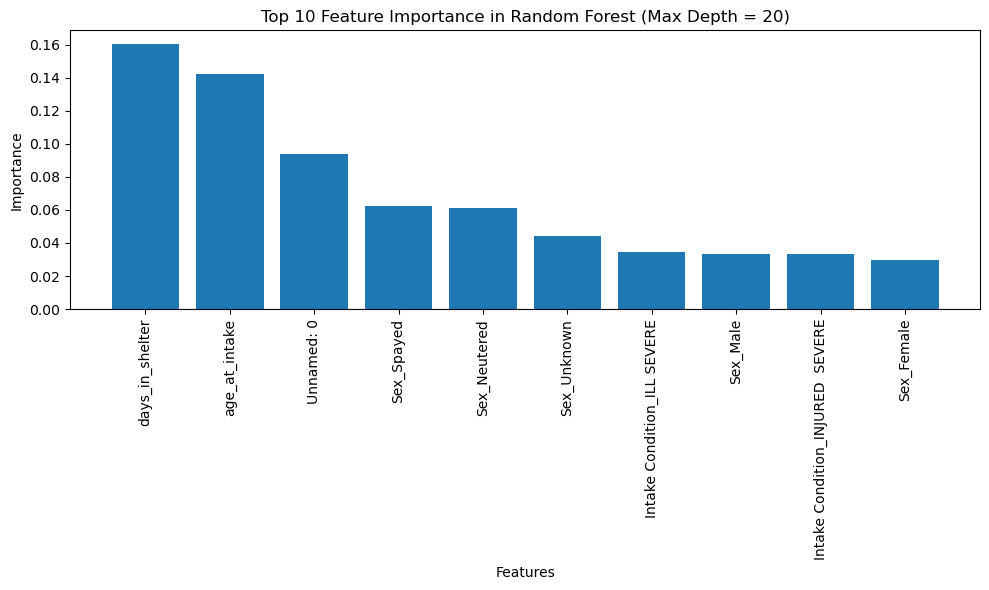

In [11]:
model = RandomForestClassifier(max_depth=20)
model.fit(X_train, y_train)

importances = model.feature_importances_

sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

feature_names = X.columns
sorted_feature_names = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices][:10]
sorted_feature_names = feature_names[sorted_indices][:10]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance in Random Forest (Max Depth = 20)')
plt.tight_layout()

plt.show()

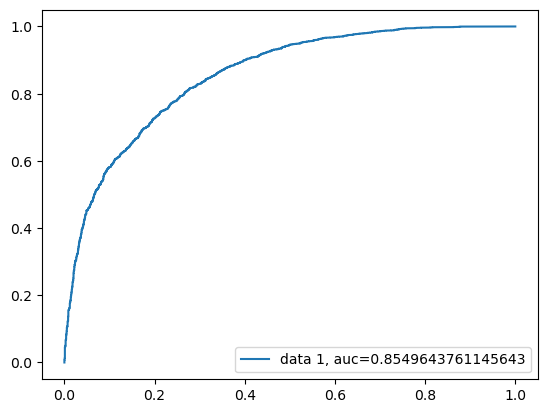

ROC-AUC Score:  0.8549643761145643


In [12]:
# ROC-AUC Curve
y_pred_proba = model.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print("ROC-AUC Score: ", roc_auc_score(y_test, y_pred_proba, average=None))

<Figure size 640x480 with 0 Axes>

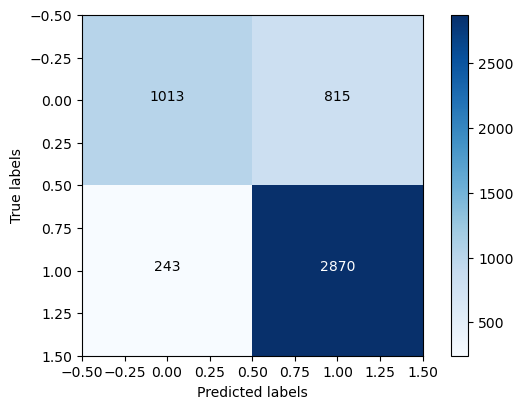

In [13]:
# Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [20]:
# Evaluation Metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.53      0.64      1828
           1       0.77      0.93      0.84      3113

    accuracy                           0.78      4941
   macro avg       0.79      0.73      0.74      4941
weighted avg       0.79      0.78      0.77      4941



In [14]:
# Specificity
spec = cm[0][0] / (cm[0][0] + cm[1][0])
print('Specificity: ', spec)

Specificity:  0.8065286624203821


Our Random Forests model performed well with it performing with an accuracy of 78% on our test data. Our model also has an ROC-AUC score of 0.85, which means it performs extremely well and is highly accurate. When looking at other evaluation metrics, we see that our model has a recall score of 93%, precision score of 77%, specificity score of 80%, and a f1-score of 84%. 



### Other Algorithm Exploration

Since our Random Forests model performed better than our Logit model, we decided to look at other algorithms as well to see if we could get better performance using different algorithms since our predecessor<a name="dani"></a>[<sup>[3]</sup>](#dani) used a Random Forests algorithm as well. Since these algorithms did not perform significantly better, we have left them out of this notebook.

If you are interested in our results, you can view our results [here](https://github.com/COGS118A/Group009-SP23/tree/main/Code).

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

#### Best Model
Our results indicate that the Random Forest model was the best for this problem. The evaluation metrics for Random Forest indicate the validity of this model compared to the rest of the models. Our Random Forests model performs better in every metric except recall (and precision by 1%) than our Logistic Regression model. However, since our goal is to identify cats less likely to have a good outcome, a higher specificity score would be more relevant to our issue. For this reason, the Forest Model is the best for classifying cats that come into the Long Beach Animal Shelter. 

#### Tree Depth for Random Forests
We examined several models for our Random Forest classifier before settling on a final one. After iterating across multiple maximum tree depths, we determined that the tree with the highest depth (20) was most appropriate for our model while avoiding overfitting. Even though metrics like precision and accuracy remained the same across the models, the ROC-AUC score increased as the maximum tree depth increased. 

#### Exploratory Data Analysis
In our data analysis, we have also found the importance of various features within the dataset. For example, we have found that some essential variables when predicting a cat's outcome are the number of days in the shelter, their age when they enter the shelter, whether they have been spayed or neutered, and whether the cat has a name. Specifically, the possibility of getting a "good outcome" increases as they spend more days at the shelter. However, the probability of a "good outcome" decreases as the cat ages. The most common cat that the shelter sees is a black and white cat, also known as a "tuxedo" cat. The majority of cats come in from owners instead of off the street.


### Limitations

As the frequency tables indicate, some data categories have many more data points than others. The imbalance in data points might result in the model changing the weights due to "biased" data instead of what is best for predictions. Even though our performance metrics indicate a high-performance rating, the animal shelter might not consider them sufficient for making hard predictions on how they should treat a cat. The best use for our model is as a guide instead of an "end all" prediction. 


### Ethics & Privacy

There should not be many obvious ethical implications since the data collected is not on human subjects. However, there is an issue of privacy with the data as the Long Beach animal shelter has a record of where the cats were taken from. This may be a privacy issue because the addresses of owners who have chosen to surrender their cat are published in the dataset and it is unknown to us if this data was collected with the owners’ permission. This is especially a concern if the cat was taken due to mistreatment and/or abuse as animal abusers can possibly be tracked down and harassed with this data. However, we do not plan on using any locational data in our model so it should not be an issue. 

Another concern that could possibly arise is due to data bias. Since our model was trained on data from animal shelters in the City of Long Beach, we cannot state that our model will be accurate in different areas of the country. Different areas may look for different qualities in pets. Therefore, shelters that are not represented in our dataset should be advised that this model may not accurately predict the outcomes of cats in their area. 

There is also the possibility of our model being used to evaluate whether or not a cat is worth taking care of or should be taken for euthanasia. Since animal shelters are always lacking in resources, they will often be making the choice of which animals are to be euthanized. This possibility may be unlikely (but definitely possible) since most animal shelters are non-profit, which means there would be no real motivation to neglect animals based on how likely it is for them to be adopted. Our model also only predicts the likelihood of a positive outcome occurring, not necessarily adoption.

### Conclusion

Based on our Random Forest Classifier, the number of days spent in the shelter, the cat's age, sterility, sex, and health are the best predictors of a cat receiving a good outcome. Our Random Forest classification model best accurately predict the outcomes of cats in animal shelters compared to other algorithms we worked with. Compared to the work of our predecessors<a name="dani"></a>[<sup>[3]</sup>](#dani)<a name="mohammad"></a>[<sup>[4]</sup>](#mohammad), our model has a limited `max_depth` and yet achieves the best performance when comparing accuracy and F1-scores to the previous Random Forest models done on the topic, meaning we have surpassed relevant previous work done on shelter animals. Since our best model received an accuracy rate of 78%, there is always more that could be done to improve the the predictions. Future work could perhaps explore better algorithms to help best predict the outcomes of cats in animal shelters in order to better identify cats that need the most support. 

# Footnotes
<a name="cat_ecosys"></a>1.[^](#cat_ecosys): Crocodile Lake National Wildlife Refuge. (2015, March). Protect Wildlife: Keep Cats Indoors. U.S. Fish and Wildlife Service. https://www.fws.gov/sites/default/files/documents/keep-cats-indoors.pdf <br> 
<a name="petstats"></a>2.[^](#petstats): Pet Statistics. ASPCA. (n.d.). https://www.aspca.org/helping-people-pets/shelter-intake-and-surrender/pet-statistics <br>
<a name="dani"></a>3.[^](#dani): Altshuler, D. (2019, January 26). Shelter Animal Predictions. GitHub. https://github.com/danielle-altshuler/shelter_animal_predictions <br>
<a name="mohammad"></a>4.[^](#mohammad): Qureshi, M. M. (2021, October 3). Mushahidq/animal_shelter_outcome_prediction: Animal Centre Shelter Outcome Prediction to help adoption of animals from animal shelters. GitHub. https://github.com/mushahidq/animal_shelter_outcome_prediction/tree/main 